# K- Means Clustering by Umar Anzar

...

## Import Libraries

- NumPy: A Python library used for numerical computing. It provides support for multidimensional arrays and matrices, along with functions to perform mathematical operations on them.

- Pandas: A library used for data manipulation and analysis. It provides data structures for efficient storage and manipulation of tabular data.

- Matplotlib: A plotting library for creating static, interactive, and animated visualizations in Python.

- Seaborn: A data visualization library based on Matplotlib.

- Scikit-learn: A machine learning library for Python. It provides a range of algorithms for classification, regression, clustering, and dimensionality reduction, along with tools for model selection and evaluation.

In [17]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
# allows for displaying plots inline within the notebook
%matplotlib inline 

## Import Dataset

In [55]:
iris = datasets.load_iris()
print(iris.keys())
iris.data[:4,:] # print some rows

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [34]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
columnNameFunc = lambda x: (x.replace(" ","_",1)).replace(" ","")
columnName = list(map(columnNameFunc, iris.feature_names))
columnName

['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)']

In [53]:
dataset = pd.DataFrame(data=iris.data, columns=columnName)
dataset.head(5)

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot 2d Graph
By observing the scatter plot graph, it can be inferred that there is a strong relationship between scores and hours, which seems to be directly proportional. As the number of hours increase, the scores also tend to increase.

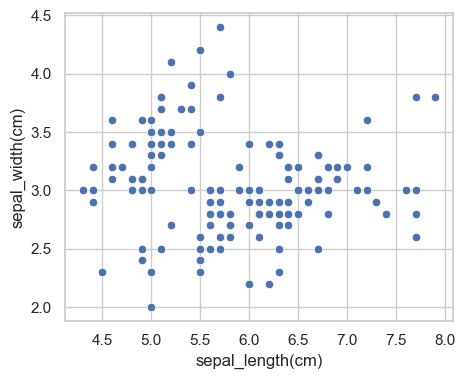

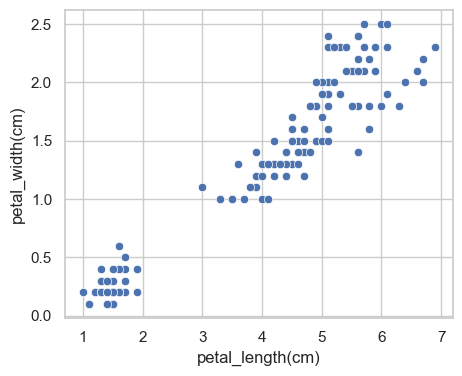

In [58]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid")

sns.scatterplot(x='sepal_length(cm)',y='sepal_width(cm)',data=dataset)
plt.show()
sns.scatterplot(x='petal_length(cm)',y='petal_width(cm)',data=dataset)
plt.show()


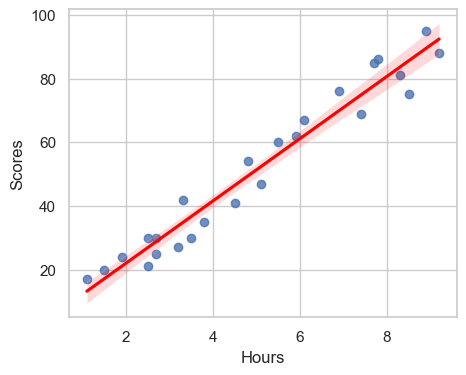

In [4]:
plt.scatt

## Preparing X and Y

In [5]:
x = dataset.iloc[:,:1].values
y = dataset.iloc[:,-1].values

## Predicting Dataset

Data is split into two sets: training and testing data. The model is trained on the training data and then used to predict the target value of the test data. The error between the true and predicted target value is then calculated to evaluate the performance of the model.

### Train/Test Split

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 0)

In [7]:
model = LinearRegression()
model.fit(train_x,train_y)
m = model.coef_
c = model.intercept_
Y_axis = m*x + c

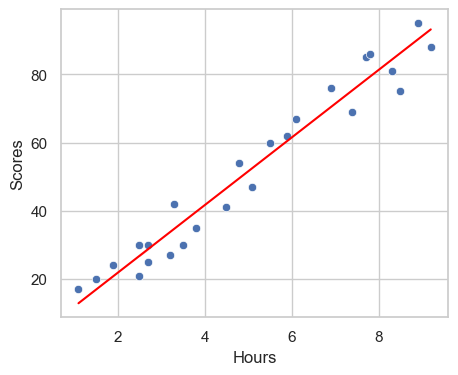

In [8]:
sns.scatterplot(x='Hours',y='Scores',data=dataset)
sns.lineplot(x=x.flatten(),y=Y_axis.flatten(), color='red')
plt.show()

### Prediction

In [9]:
y_pred = model.predict(test_x)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Evaluation
- mean_squared_error: A function from scikit-learn.metrics used to compute the mean squared error between the predicted and actual values.

- mean_absolute_error: A function from scikit-learn.metrics used to compute the mean absolute error between the predicted and actual values.

- r2_score: A function from scikit-learn.metrics used to compute the R-squared (coefficient of determination) regression score function.

In [10]:
print('mean_squared_error', mean_squared_error(test_y, y_pred), '\n',
      'mean_absolute_error', mean_absolute_error(test_y, y_pred), '\n',
      'r2_score', r2_score(test_y, y_pred))

mean_squared_error 21.598769307217413 
 mean_absolute_error 4.18385989900298 
 r2_score 0.9454906892105355


## Cross-Validation 

Cross-validation is a technique used to evaluate the performance of a machine learning model on unseen data. It is done by splitting the dataset into multiple folds, then training the model on each fold and evaluating it on the remaining folds. This process is repeated multiple times, with each fold used as a test set once. The final performance of the model is then averaged over all the folds.

In this case, the dataset is split at a random state different on each iteration. This means that each time the cross-validation process is run, a different set of training and test folds will be created. This helps to ensure that the performance of the model is not simply due to chance.

### Error Function
This function returns a data frame row containing the error metrics of model evaluation.

In [11]:
def error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mean_squared_error':mse, 'mean_absolute_error':mae, 'r2_score':r2}

In [12]:
errorDf = pd.DataFrame(columns=['random_state', 'mean_squared_error', 'mean_absolute_error', 'r2_score'])

model = LinearRegression()
for rdmState in range(1,200,5):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = rdmState)
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    result = error(test_y, pred_y)
    result['random_state'] = rdmState
    errorDf = errorDf.append(result, ignore_index=True)

errorDf.head(5)

,random_state,mean_squared_error,mean_absolute_error,r2_score
0,1.0,68.880921,7.882398,0.842103
1,6.0,18.765475,4.230413,0.972394
2,11.0,78.660909,8.237073,0.881990
3,16.0,50.029620,6.682278,0.835299
4,21.0,30.680774,5.332780,0.884031


### Plotting Histogram

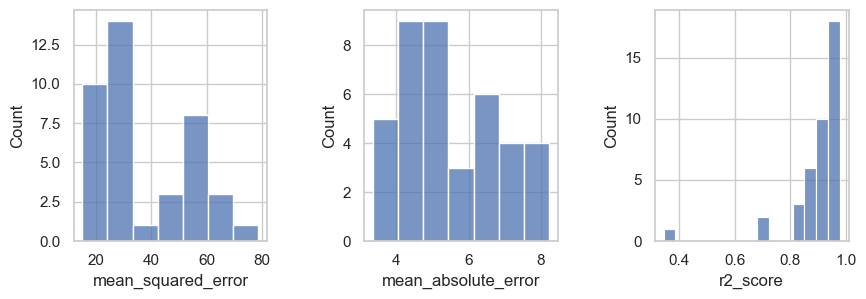

In [13]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# Plot histograms for each column on a separate subplot
sns.histplot(data=errorDf, x='mean_squared_error', ax=axes[0])
sns.histplot(data=errorDf, x='mean_absolute_error', ax=axes[1])
sns.histplot(data=errorDf, x='r2_score', ax=axes[2])
plt.show()

## Result
Overall, the model is performing well. The MSE and MAE are relatively small, and the R2 score is high. This means that the model is able to accurately predict the true values.

- The mean squared error is higher than the mean absolute error. This is because the squared error is more sensitive to outliers than the absolute error.
- The R2 score is close to 1. This means that the model is able to explain a large amount of the variance in the true values.

In [14]:
errorDf.drop('random_state', axis=1).agg(['mean','median']).transpose()

,mean,median
mean_squared_error,37.598356,30.740782
mean_absolute_error,5.546015,5.288847
r2_score,0.901040,0.926632
